# 逻辑回归

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import math

In [2]:
pddata = pd.read_csv('data1.csv',header = None, names = ['x' + str(i) for i in range(1,56)] + ['y'])
pddata

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.398,0.000,0.000,1.181,5,26,0
3096,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.105,0.105,0.000,0.000,0.000,1.000,1,30,0
3097,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,1.166,3,14,0
3098,0.00,0.00,0.67,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.493,0.000,0.000,0.000,0.000,1.240,3,31,0


In [3]:
pddata.insert(0, 'x0', 1)
pddata

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,y
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,1,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,...,0.00,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.398,0.000,0.000,1.181,5,26,0
3096,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.105,0.105,0.000,0.000,0.000,1.000,1,30,0
3097,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,1.166,3,14,0
3098,1,0.00,0.00,0.67,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.493,0.000,0.000,0.000,0.000,1.240,3,31,0


In [4]:
pdvalues = pddata.values #转换成numpy形式便于进行矩阵运算
pdvalues

array([[1.000e+00, 0.000e+00, 6.400e-01, ..., 6.100e+01, 2.780e+02,
        1.000e+00],
       [1.000e+00, 2.100e-01, 2.800e-01, ..., 1.010e+02, 1.028e+03,
        1.000e+00],
       [1.000e+00, 6.000e-02, 0.000e+00, ..., 4.850e+02, 2.259e+03,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 1.400e+01,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 3.100e+01,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 8.000e+00,
        0.000e+00]])

In [5]:
def pltshow(X, Y, points = 2, cate = 1):
    c1 = ['b', 'r', 'y', 'g']
    marker1 = ['x', 'o', 'x', 'o']
    label = ['one', 'two', 'three', 'four']
    fig, ax = plt.subplots(figsize = (10, 5))
    if cate == 1:
        for i in range(points):
            positive = X[Y == i]
            ax.scatter(positive[:, 0], positive[:, 1], s = 30, c = c1[i], marker = marker1[i], label = label[i])
    elif cate == 2:
        ax.scatter(X, Y, s = 30)
    else:
        ax.plot(X, Y, c = 'b', label = 'pass')
        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

In [25]:
cols = pdvalues.shape[1]
X = pdvalues[:, 0:cols - 1]
Y = pdvalues[:, cols - 1]
shape = pdvalues.shape
shape
print(cols)

57


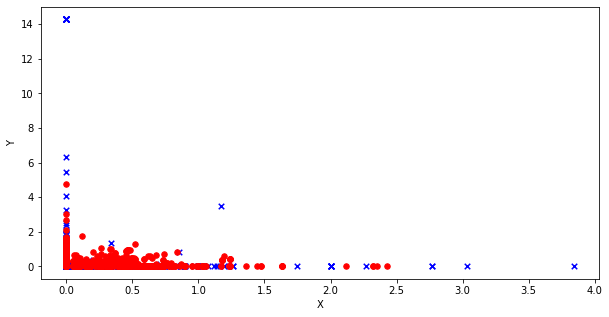

In [7]:
pltshow(pdvalues[:,1:3], Y, points = 2, cate = 1)

In [8]:
theta = np.zeros(cols - 1)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [29]:
def sigmoid(x):
    x_ravel = x.ravel()  # 将numpy数组展平
    length = len(x_ravel)
    y = []
    for index in range(length):
        if x_ravel[index] >= 0:
            y.append(1.0 / (1 + np.exp(-x_ravel[index])))
        else:
            y.append(np.exp(x_ravel[index]) / (np.exp(x_ravel[index]) + 1))
    return np.array(y).reshape(x.shape)

In [10]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

# 初始化

In [12]:
#损失函数
def loss(Xc, Yc, theta):
    xlen = Xc.shape[0]
    left = np.multiply((Yc - 1),np.log(1 - model(Xc,theta) + 1e-5))
    right = np.multiply(Yc, np.log(model(Xc,theta)))
    cost = np.sum(left-right)/xlen
    return cost

In [13]:
#梯度计算
def gradient(Xn, Yn, theta):
    xshape0 = Xn.shape[0]
    xshape1 = Xn.shape[1]
    grad = np.zeros(xshape1)
    chazhi = model(Xn, theta) - Yn #h（theta）-y
    for j in range(xshape1):
        onegrad = np.multiply(chazhi, Xn[:, j])
        onegrad = np.sum(onegrad, axis = 0)/xshape0
        grad[j] = onegrad
    return grad

In [14]:
#打乱数据
def shuffledata(datashuffle):
    np.random.shuffle(datashuffle)
    colsd = datashuffle.shape[1]
    X = datashuffle[:, :colsd - 1]
    Y = datashuffle[:, colsd]
    return X, Y

In [28]:
X = pdvalues[:, 0:cols - 1]
Y = pdvalues[:, cols - 1]
print(X, Y)

[[1.000e+00 0.000e+00 6.400e-01 ... 3.756e+00 6.100e+01 2.780e+02]
 [1.000e+00 2.100e-01 2.800e-01 ... 5.114e+00 1.010e+02 1.028e+03]
 [1.000e+00 6.000e-02 0.000e+00 ... 9.821e+00 4.850e+02 2.259e+03]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 1.166e+00 3.000e+00 1.400e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.240e+00 3.000e+00 3.100e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 1.000e+00 8.000e+00]] [1. 1. 1. ... 0. 0. 0.]


In [39]:
#梯度下降训练
def train(pdvalues,theta,celve = 2,xuexilv = 0.001, val = 0.02):
    ticks = time.time()
    X = pdvalues[:, 0:cols - 1]
    Y = pdvalues[:, cols - 1]
    Y1 = Y.copy()
    i = 0
    grad = gradient(X, Y, theta)
    costnp = []
    
    tg = []
    tg1 = []
    tg1.append(theta[1])
    tg1.append(grad[1])
    tg.append(tg1)
    
    while True:
        
        theta = theta - xuexilv * grad
        grad = gradient(X, Y, theta)
        
        i = i + 1
        if i < 15000:
            tg1 = []
            tg1.append(theta[1])
            tg1.append(grad[1])
            tg.append(tg1)
        if i % 2000 == 0:
            cost1 = loss(X, Y, theta)
            cost2 = []
            cost2.append(i)
            cost2.append(cost1)
            costnp.append(cost2)
            
        if celve == 1:
            if i > val:
                break
        elif celve == 2:
            if np.linalg.norm(grad) < val:
                break
        else:
            pass
    costnp = np.array(costnp)
    tgnp = np.array(tg)
    
    print('loss:', loss(X, Y, theta))
    
    Y = np.dot(X, theta.T)
    for k,i in enumerate(Y):
        if i > 0:
            Y[k] = 1
        else:
            Y[k] = 0
            
    #算后散点图
    pltshow(X[:, 1:3], Y, points = 2)
    shapeY = Y.shape[0]
    #正确率
    correct = []
    for k, i in enumerate(Y):
        if i == Y1[k]:
            correct.append(1)
        else:
            if i == 0:
                Y[k] = 3
            else:
                Y[k] = 2
    accuracy = len(correct)/shapeY
    
#     print(X[0:20])
#     print(Y[0:20])
#     exit()

    pltshow(X[:, 1:3],Y, points = 4)
    pltshow(costnp[:, 0], costnp[:, 1], '', cate = 3)
    pltshow(tgnp[:, 0], tgnp[:, 1],'', cate = 3)
    pltshow(tgnp[:, 0], tgnp[:, 1], points = 1, cate = 2)
    
    print('范数：', np.linalg.norm(grad))
    print('theta', theta)
    print('grad:',grad)
    print('准确率：',accuracy)
    ticks1 = time.time()
    yunxingshijian = ticks1 - ticks
    print('运行时间：',yunxingshijian)

原图


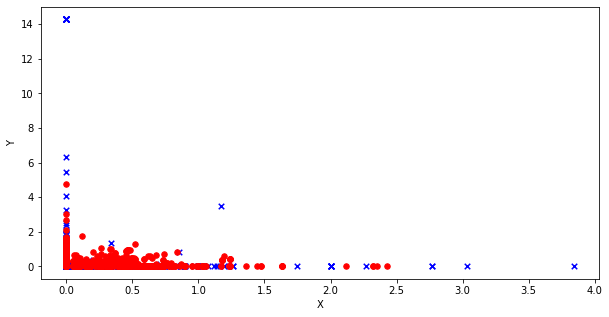

训练后图


C:\Users\hp\AppData\Local\Temp/ipykernel_21256/3976407412.py:4: RuntimeWarning: divide by zero encountered in log
  left = np.multiply((Yc - 1),np.log(1 - model(Xc,theta)))
C:\Users\hp\AppData\Local\Temp/ipykernel_21256/3976407412.py:4: RuntimeWarning: invalid value encountered in multiply
  left = np.multiply((Yc - 1),np.log(1 - model(Xc,theta)))
C:\Users\hp\AppData\Local\Temp/ipykernel_21256/3976407412.py:5: RuntimeWarning: divide by zero encountered in log
  right = np.multiply(Yc, np.log(model(Xc,theta)))
C:\Users\hp\AppData\Local\Temp/ipykernel_21256/3976407412.py:5: RuntimeWarning: invalid value encountered in multiply
  right = np.multiply(Yc, np.log(model(Xc,theta)))


loss: nan


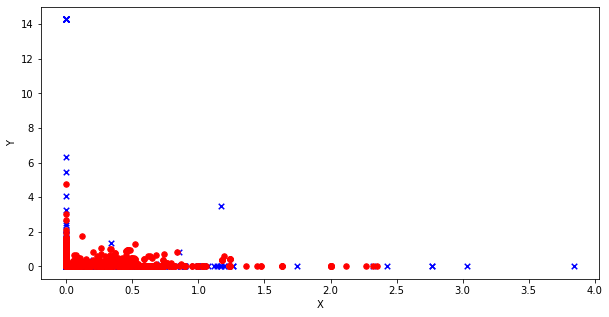

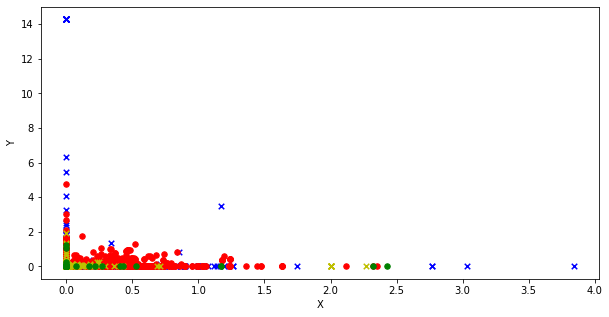

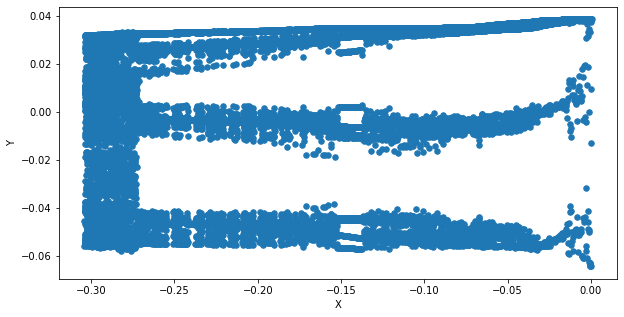

范数： 36.65260044321341
theta [-3.78280578e+01 -1.86806150e-01  1.70718575e+00  3.55953320e+00
  5.73077911e+00  6.73645099e+00  6.76594075e+00  9.84281668e+00
  6.79772660e+00  2.55956511e+00  2.90986689e+00 -4.24419683e-01
 -1.34128697e+01  4.47834784e+00  7.21370793e-01  4.70041171e+00
  1.53196131e+01  5.56580341e+00  7.04002245e+00  6.24255625e+00
  8.69964037e+00  3.85048158e+00  1.66140678e+01  1.60961895e+01
  1.27420314e+01 -7.00785592e+01 -2.90331844e+01 -2.35539677e+01
 -1.19738757e+01 -7.86041145e+00 -8.77800939e+00 -6.24773936e+00
 -3.37411391e+00 -2.02972105e+01 -3.63305276e+00 -1.11657779e+01
 -6.60542161e+00 -1.90707241e+01 -2.72151820e+00 -8.24539191e+00
 -6.09434172e+00 -6.97587442e+00 -1.36264849e+01 -5.81504868e+00
 -8.20357556e+00 -8.64800069e+00 -1.11607178e+01 -2.56674968e+00
 -8.09156680e+00 -1.90582459e+00  2.25879844e+01  1.18518590e+01
  3.03800802e+00 -1.76834715e+00  1.24789827e+00  6.50604858e-02]
grad: [ 3.45373806e-02  5.95996782e-03  2.55996533e-03  1.110

In [53]:
print('原图')
pltshow(pdvalues[:,1:3], Y, points = 2, cate = 1)
print('训练后图')
train(pdvalues, theta,celve = 1, xuexilv = 0.01, val = 100000)

原图


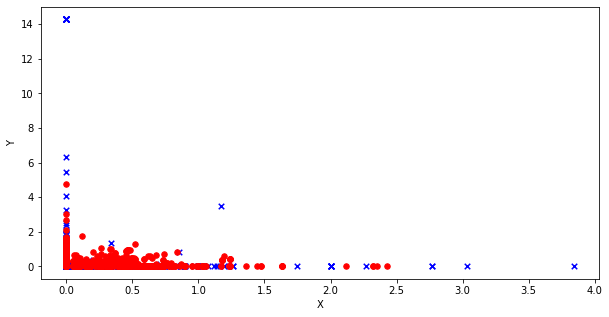

训练后图


C:\Users\hp\AppData\Local\Temp/ipykernel_21256/3976407412.py:4: RuntimeWarning: divide by zero encountered in log
  left = np.multiply((Yc - 1),np.log(1 - model(Xc,theta)))
C:\Users\hp\AppData\Local\Temp/ipykernel_21256/3976407412.py:4: RuntimeWarning: invalid value encountered in multiply
  left = np.multiply((Yc - 1),np.log(1 - model(Xc,theta)))
C:\Users\hp\AppData\Local\Temp/ipykernel_21256/3976407412.py:5: RuntimeWarning: divide by zero encountered in log
  right = np.multiply(Yc, np.log(model(Xc,theta)))
C:\Users\hp\AppData\Local\Temp/ipykernel_21256/3976407412.py:5: RuntimeWarning: invalid value encountered in multiply
  right = np.multiply(Yc, np.log(model(Xc,theta)))


loss: nan


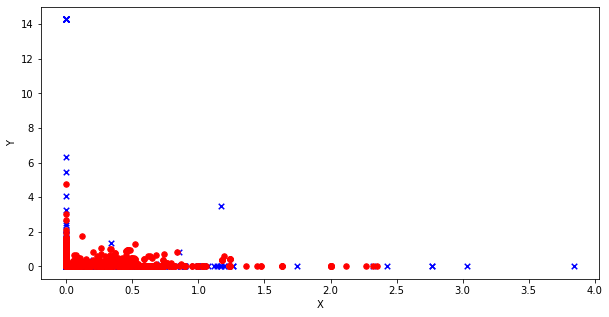

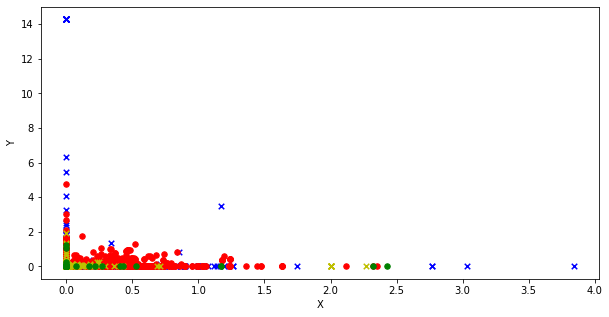

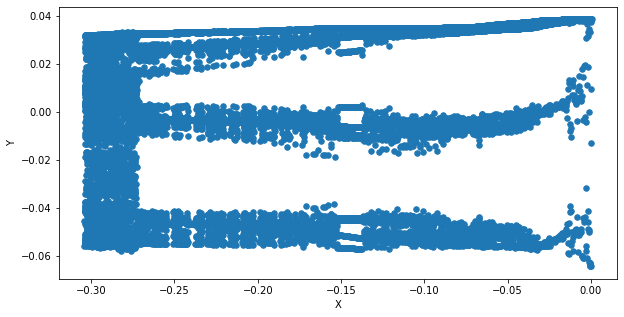

范数： 36.65260044321341
theta [-3.78280578e+01 -1.86806150e-01  1.70718575e+00  3.55953320e+00
  5.73077911e+00  6.73645099e+00  6.76594075e+00  9.84281668e+00
  6.79772660e+00  2.55956511e+00  2.90986689e+00 -4.24419683e-01
 -1.34128697e+01  4.47834784e+00  7.21370793e-01  4.70041171e+00
  1.53196131e+01  5.56580341e+00  7.04002245e+00  6.24255625e+00
  8.69964037e+00  3.85048158e+00  1.66140678e+01  1.60961895e+01
  1.27420314e+01 -7.00785592e+01 -2.90331844e+01 -2.35539677e+01
 -1.19738757e+01 -7.86041145e+00 -8.77800939e+00 -6.24773936e+00
 -3.37411391e+00 -2.02972105e+01 -3.63305276e+00 -1.11657779e+01
 -6.60542161e+00 -1.90707241e+01 -2.72151820e+00 -8.24539191e+00
 -6.09434172e+00 -6.97587442e+00 -1.36264849e+01 -5.81504868e+00
 -8.20357556e+00 -8.64800069e+00 -1.11607178e+01 -2.56674968e+00
 -8.09156680e+00 -1.90582459e+00  2.25879844e+01  1.18518590e+01
  3.03800802e+00 -1.76834715e+00  1.24789827e+00  6.50604858e-02]
grad: [ 3.45373806e-02  5.95996782e-03  2.55996533e-03  1.110

In [57]:
print('原图')
pltshow(pdvalues[:,1:3], Y, points = 2, cate = 1)
print('训练后图')
train(pdvalues, theta,celve = 1, xuexilv = 0.01, val = 100000)